In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis='columns', inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [7]:
inputs = df.drop('Survived', axis='columns')
target = df['Survived']

In [8]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [10]:
inputs = pd.concat([inputs, dummies], axis='columns')
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [11]:
inputs.drop(['Sex', 'female'], axis='columns', inplace=True)
inputs.head()

,Pclass,Age,Fare,male
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [13]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [14]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [15]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [16]:
inputs.Age[:10]

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

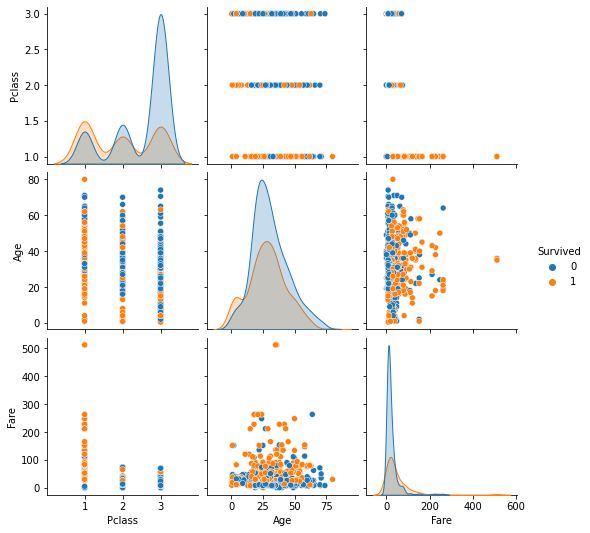

In [24]:
sns.pairplot(df, hue='Survived')

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

In [19]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [20]:
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
model.score(X_test,y_test)

0.7649253731343284

In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.76      , 0.8       , 0.76      , 0.78225806, 0.77419355])